<a href="https://colab.research.google.com/github/KurniawatiAgustina/PCVK/blob/main/week9_Morfologi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Kurniawati Agustina**

**Kelas : 3A**

**No Absn : 15**

# **TUGAS PRAKTIKUM**

**import folder yang ada di Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Membuat fungsi Dilasi pada citra dengan SED berbentuk cross 3x3 tanpa menggunakan library morphology dari openCV**

In [3]:
def dilasi_citra(F, w):
  p,q = F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)
  SED = np.ones((w,w),dtype=np.uint8)
  constant1 = (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)

  return imgD

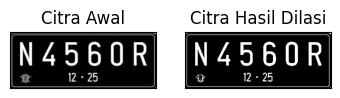

In [4]:
img_d = cv2.imread('/content/drive/MyDrive/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w = 2
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

**Membuat fungsi Dilasi pada citra dengan SED berbentuk cross 3x3 dengan menggunakan library morphology dari openCV**

[[1 1 1]
 [1 1 1]
 [1 1 1]]


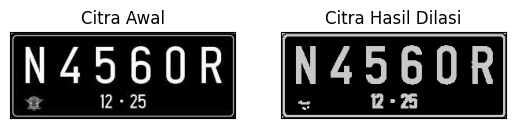

In [5]:
img = cv2.imread('/content/drive/MyDrive/plat nomer.jpg')
ret, thresh = cv2.threshold(img, 165, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

**Membuat fungsi erosi dengan SE berbentuk square 5x5 tanpa menggunakan library morphology**

In [6]:
def erosi_citra(F,k):
  m, n = F.shape

  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  imgE = np.zeros((m,n), dtype=np.uint8)

  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)

  return imgE

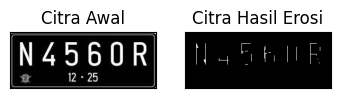

In [7]:
img_e= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Membuat fungsi erosi dengan SE berbentuk square 5x5 dengan menggunakan library morphology**

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


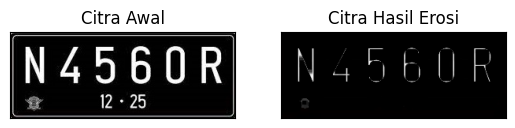

In [8]:
img = cv2.imread('/content/drive/MyDrive/plat nomer.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
print(kernel)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

**Membuat program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV**

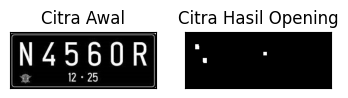

In [9]:
# tanpa library
img_o= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225,cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

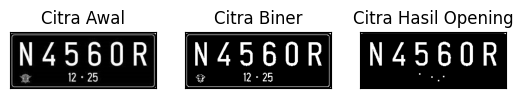

In [10]:
# menggunakan library
img = cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])

plt.show()

**Membuat program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV**

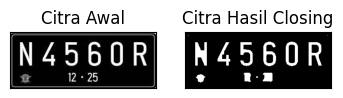

In [11]:
# tanpa library
img_c = cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

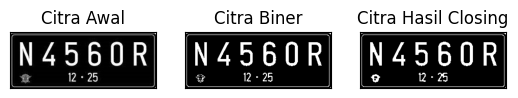

In [12]:
img = cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

 **Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5**

SED=Cross3


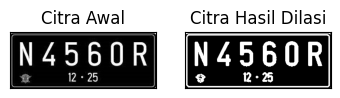

SED = Cross 5


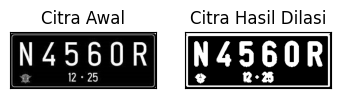

In [13]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED=Cross3')
img_d=cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5**

SED = Circle 3


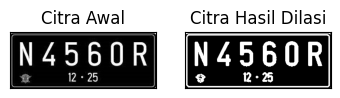

SED = Circle 5


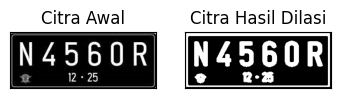

In [14]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Membuat program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7**

SE = Rectangle 3x5


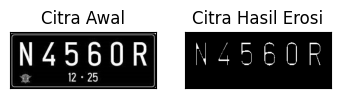

SE = Rectangle 5x7


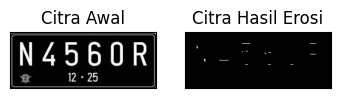

In [15]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

**Membuat program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini:**

SE = Line Vertikal 3


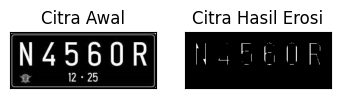

SE = Line Vertikal 5


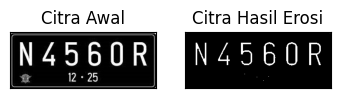

In [16]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

**TopHat**

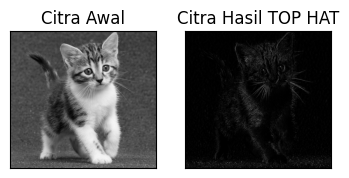

In [17]:
# Getting the kernel to be used in Top-Hat
filterSize =(4, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

**BlackHat**

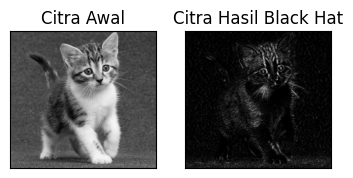

In [18]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

**Skeleton**

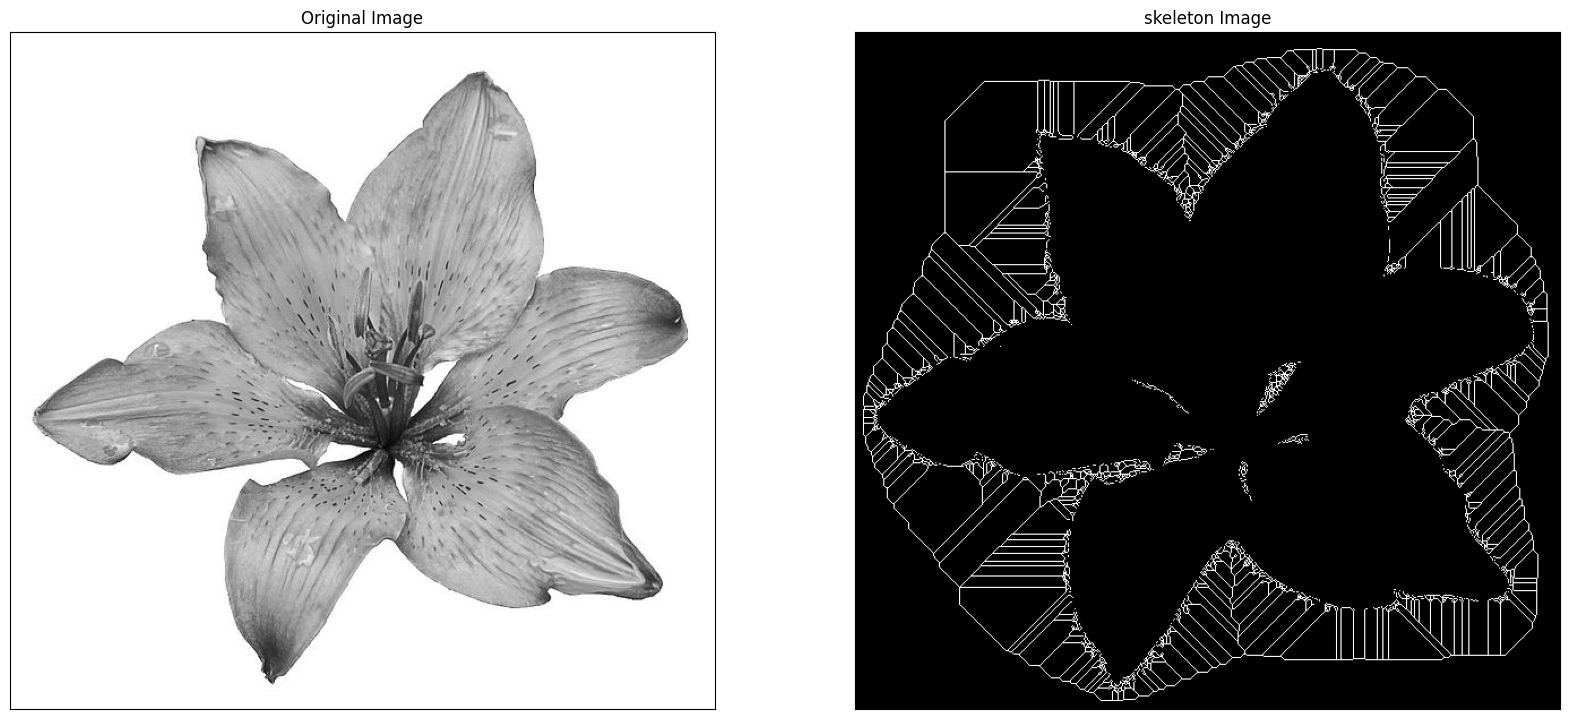

In [19]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

**Skeleton Inverse**

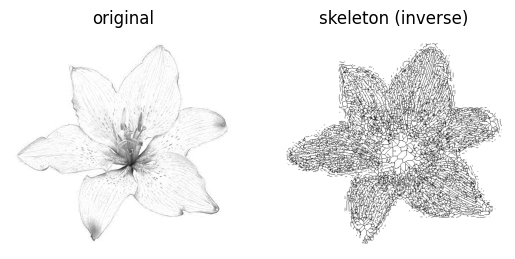

In [20]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters

from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

**Thickening**

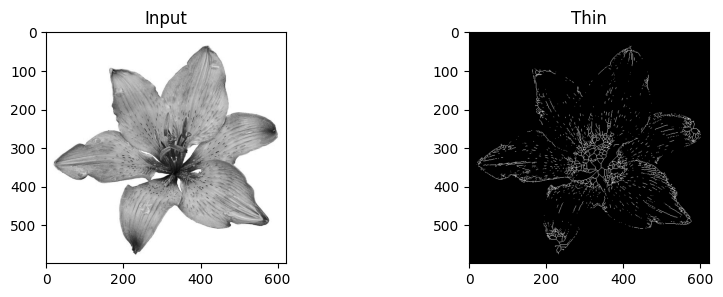

In [21]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

# **TUGAS PRAKTIKUMt**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

**KTP 1(Closing)**

In [22]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

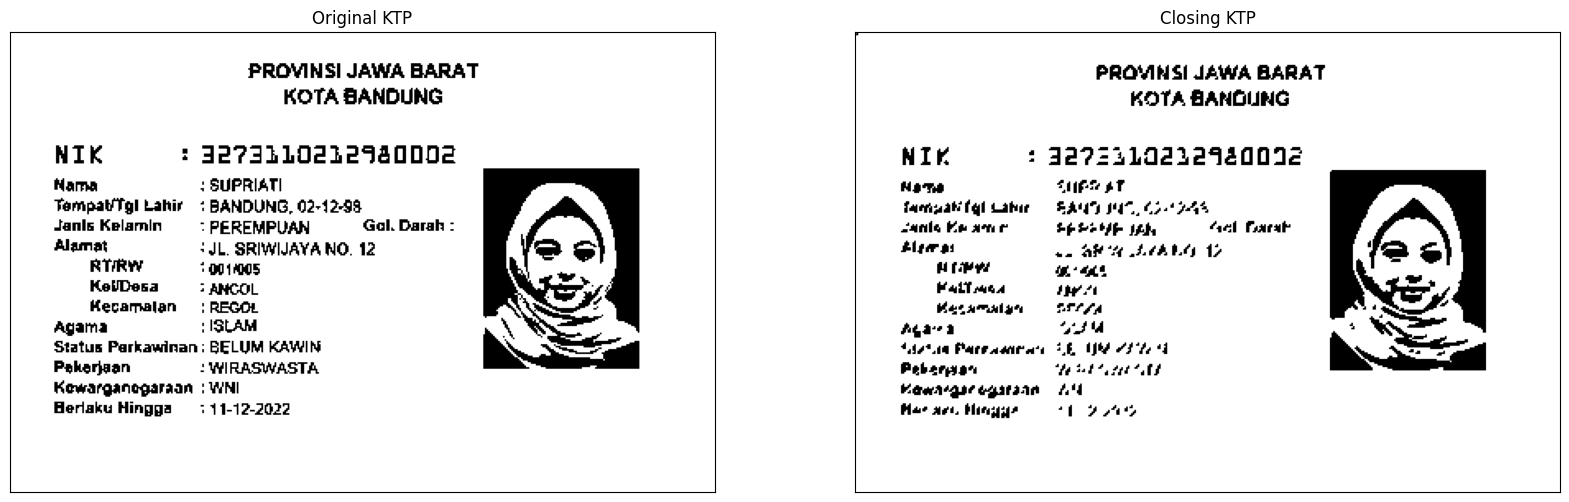

In [24]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/ktp.jpg')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv2.morphologyEx(ktp_image,cv2.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])

plt.show()

**KTP 2(Erosi)**

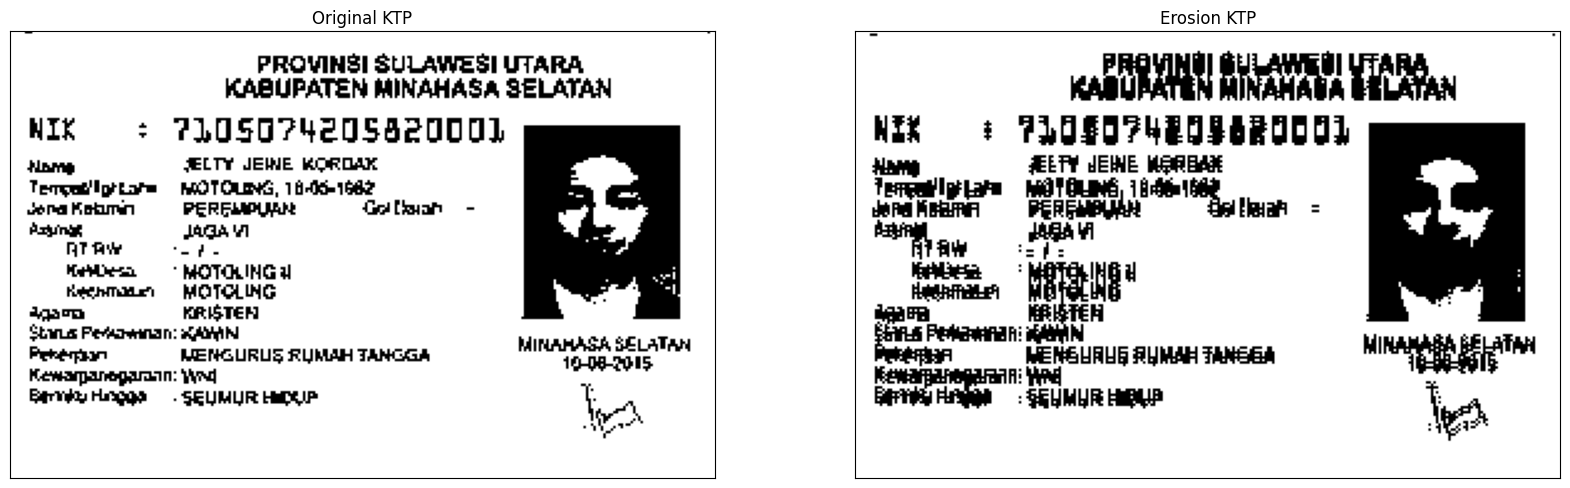

In [25]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/ktp2.jfif')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Erosi
kernel = np.array([[0, 1],[0, 0],[0, 1]], dtype = np.uint8)
erosion = cv2.erode(ktp_image,kernel,iterations = 1)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=erosion,cmap = 'gray')
plt.title('Erosion KTP'), plt.xticks([]), plt.yticks([])

plt.show()


**KTP 3(Erosi)**

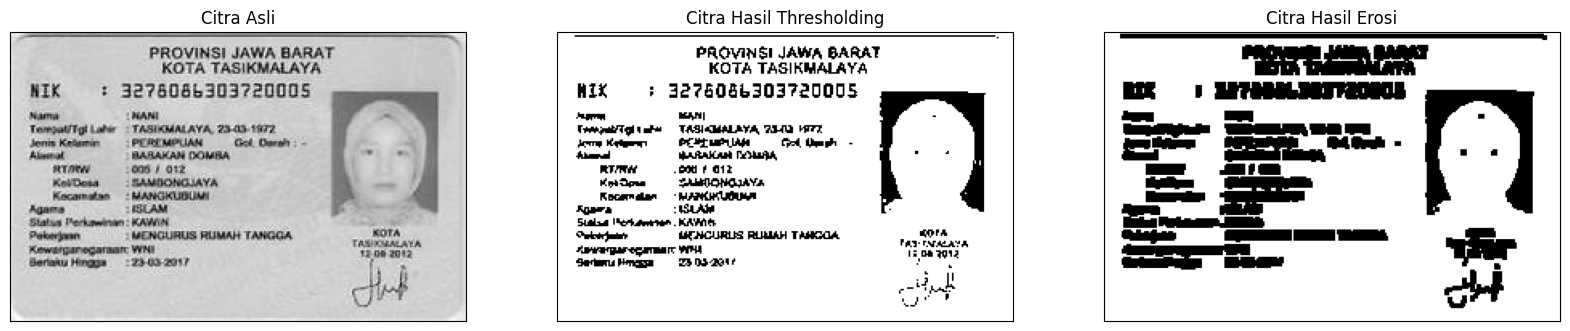

In [26]:

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/ktp3.jfif', 0)

# Melakukan thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray')
plt.title('Citra Hasil Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

**KTP 4(Top hat & Black Hat)**

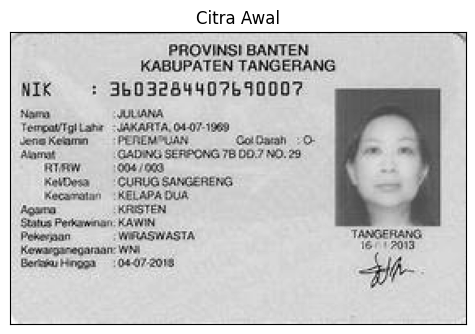

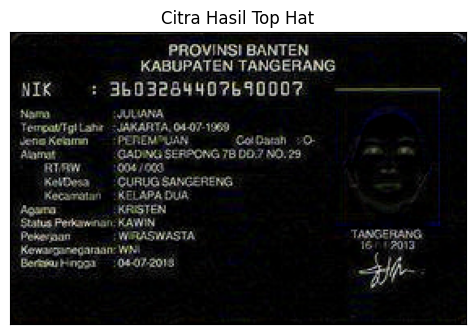

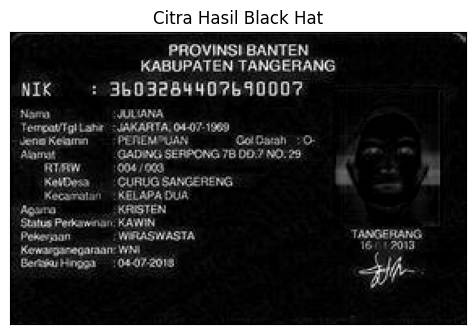

In [27]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/ktp4.jfif')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('/content/drive/MyDrive/ktp4.jfif')
input_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(input_image2, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

**KTP 5(Dilasi)**

[[1]
 [1]]


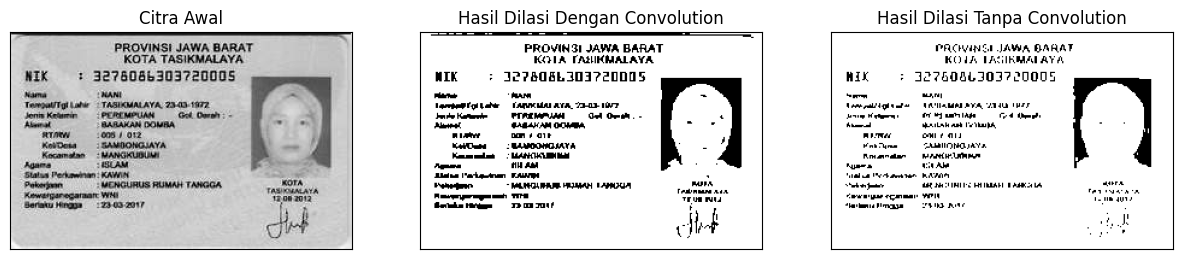

In [28]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv2.imread('/content/drive/MyDrive/ktp5.jfif')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

print(kernel)
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

**KTP 6(Opening)**

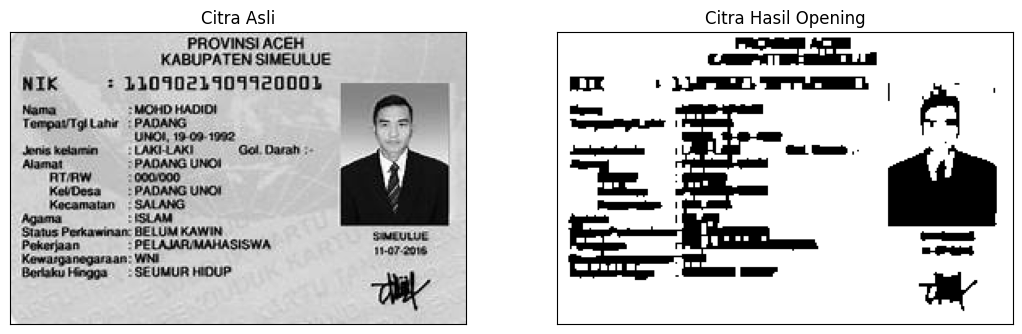

In [29]:
image_path = '/content/drive/MyDrive/ktp6.jfif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

**KTP 7(Skeleton)**

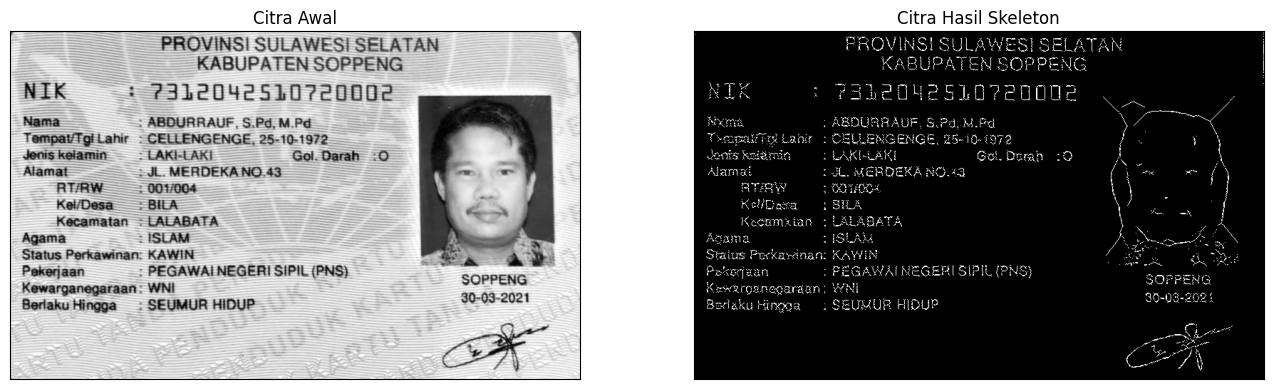

In [32]:
import cv2
import numpy as np
from IPython.display import Image, display

# Membaca citra KTP
image = cv2.imread('/content/drive/MyDrive/ktpjs.jpeg', cv2.IMREAD_GRAYSCALE)

# Binerisasi citra
ret, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membalik citra biner
binary_image = cv2.bitwise_not(binary_image)

# Menjalankan skeletonization
def skeletonize(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, image = cv2.threshold(image, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(image, temp)
        skel = cv2.bitwise_or(skel, temp)
        image = eroded.copy()

        zeros = size - cv2.countNonZero(image)
        if zeros == size:
            done = True

    return skel

skeletonized_image = skeletonize(binary_image)

plt.figure(figsize=(25,25))

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(skeletonized_image,cmap = 'gray')
plt.title('Citra Hasil Skeleton'), plt.xticks([]), plt.yticks([])
plt.show()
